In [1]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
import nltk
import wordcloud
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter


In [2]:
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import emoji
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

In [4]:
import pandas as pd
df = pd.read_csv('C:\\Users\\HP\\Desktop\\AI ASSIGMNET\\New folder\\financial.csv', encoding='latin1',names=['sentiment','text'])
df.head(10)

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
print(df['sentiment'].value_counts())

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64


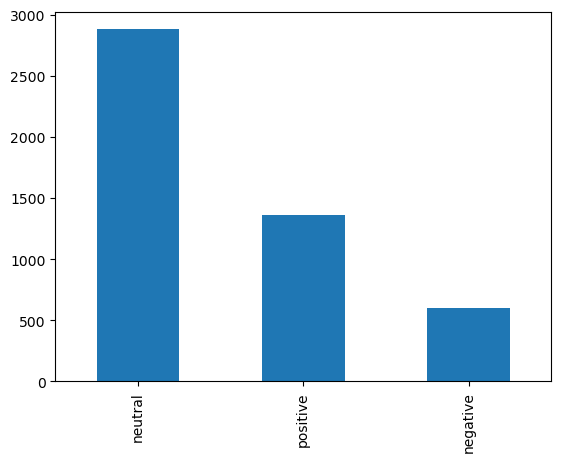

In [7]:
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

count    4846.000000
mean      128.132068
std        56.526180
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: length, dtype: float64


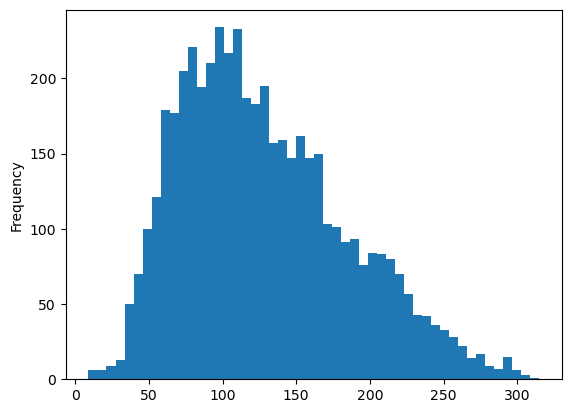

In [8]:
df['length'] = df['text'].apply(len)
print(df['length'].describe())
df['length'].plot(kind='hist', bins=50)
plt.show()

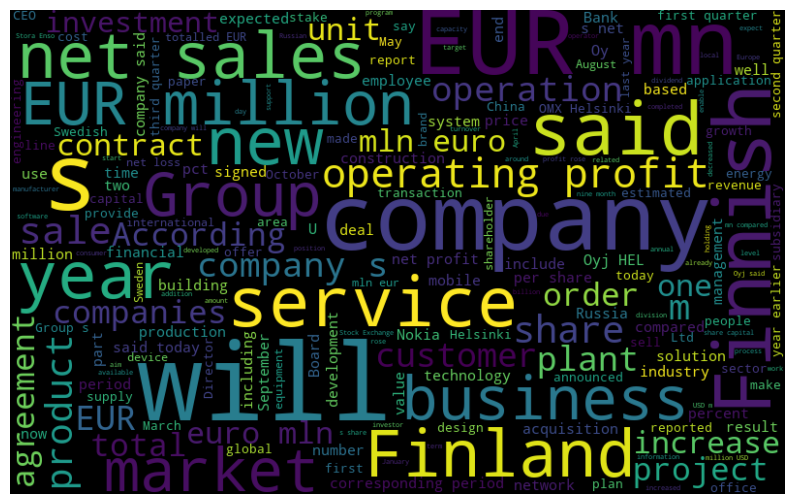

In [9]:
all_words = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

count    4846.000000
mean       23.101114
std         9.958474
min         2.000000
25%        16.000000
50%        21.000000
75%        29.000000
max        81.000000
Name: word_count, dtype: float64


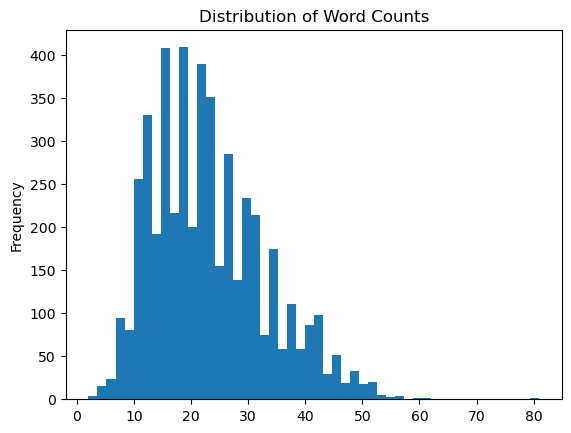

In [10]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())
df['word_count'].plot(kind='hist', bins=50)
plt.title('Distribution of Word Counts')
plt.show()

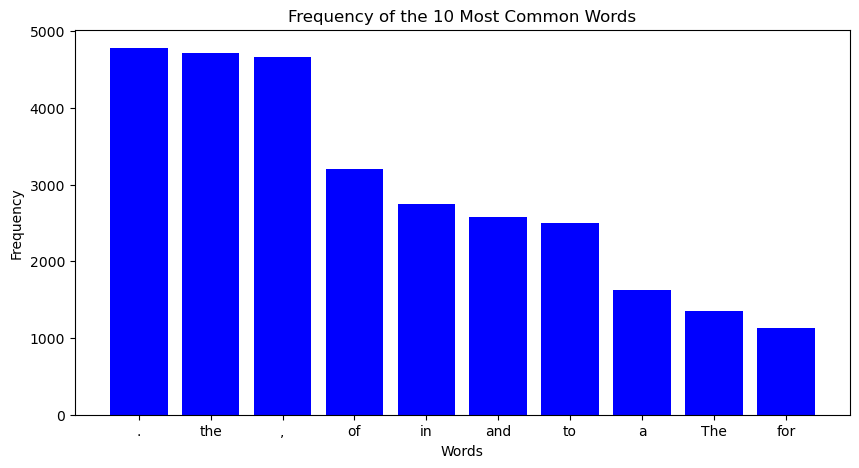

In [11]:
all_words = [word for tweet in df['text'] for word in tweet.split()]
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='b')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of the 10 Most Common Words')
plt.show()

# Preprocessing

## Cleaning the data

In [12]:
def clean_text(text):

    text = str(text).lower()
    
    # Remove Twitter handles
    text = re.sub('@\w+', '', text)
    
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    
    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove new line characters
    text = re.sub('\n', '', text)
    
    # Remove words that contain numbers
    text = re.sub('\w*\d\w*', '', text)
    
    # Convert emojis to words
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    return text

In [13]:
print("Data before preprocessing")
df['text'].head(5)

Data before preprocessing


0    According to Gran , the company has no plans t...
1    Technopolis plans to develop in stages an area...
2    The international electronic industry company ...
3    With the new production plant the company woul...
4    According to the company 's updated strategy f...
Name: text, dtype: object

In [14]:
df['cleaned_text'] = df['text'].apply(clean_text)
print("Data after preprocessing")
print(df['cleaned_text'].head(5))

Data after preprocessing
0    according to gran  the company has no plans to...
1    technopolis plans to develop in stages an area...
2    the international electronic industry company ...
3    with the new production plant the company woul...
4    according to the company s updated strategy fo...
Name: cleaned_text, dtype: object


## Tokenization

In [15]:
df['tokenized_text']=df['cleaned_text'].apply(word_tokenize)
print("Data after tokenization")
df['tokenized_text'].head(5)

Data after tokenization


0    [according, to, gran, the, company, has, no, p...
1    [technopolis, plans, to, develop, in, stages, ...
2    [the, international, electronic, industry, com...
3    [with, the, new, production, plant, the, compa...
4    [according, to, the, company, s, updated, stra...
Name: tokenized_text, dtype: object

## Removing Stop Words

In [16]:
stop_words = set(stopwords.words('english'))
print("The stop words are\n",stop_words)

The stop words are
 {'needn', 'is', 'of', 'now', 'herself', 'through', 'will', 'd', "doesn't", "couldn't", 'while', "won't", "you'd", 'had', 'about', 'her', 'from', 'isn', 'down', "wasn't", 'has', 'myself', 'but', 'having', 'some', 'm', 'won', 'shan', 'me', 'during', 'haven', 'or', "isn't", 'off', 'these', 'wasn', 'were', "you've", 'ours', 'yourself', 'once', 'ourselves', "you're", 'our', 'by', "weren't", 'those', 'there', 'itself', 'll', 'have', 'been', 'shouldn', 'not', 'both', 'didn', 'into', 'you', 'in', 'to', 'themselves', 'does', 'too', 'hers', 'doesn', 'don', 'mightn', 'how', 'it', "shouldn't", 'he', 'this', 'under', 'nor', 'here', 'own', 'same', 'and', 'y', "that'll", 'above', 'hadn', 'them', 'who', 'being', "haven't", 'aren', 'am', 're', "mustn't", 'on', 'against', 'my', "it's", 'why', 'yours', 'should', "needn't", 'a', 'such', 'than', 's', 'do', "she's", 'their', 've', 'wouldn', 'whom', 'your', 'other', 'ain', 'mustn', 'over', 'be', 'before', 'for', 'the', 'just', "wouldn't",

In [17]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
print("Data after removing stopwords:")
print(df['tokenized_text'].head(5))

Data after removing stopwords:
0    [according, gran, company, plans, move, produc...
1    [technopolis, plans, develop, stages, area, le...
2    [international, electronic, industry, company,...
3    [new, production, plant, company, would, incre...
4    [according, company, updated, strategy, years,...
Name: tokenized_text, dtype: object


## POS Tagging

In [18]:
df['pos_tagged_text'] = df['tokenized_text'].apply(lambda x: nltk.pos_tag(x))
print("Data after POS tagging")
print(df['pos_tagged_text'].head(5))

Data after POS tagging
0    [(according, VBG), (gran, NN), (company, NN), ...
1    [(technopolis, NNS), (plans, NNS), (develop, V...
2    [(international, JJ), (electronic, JJ), (indus...
3    [(new, JJ), (production, NN), (plant, NN), (co...
4    [(according, VBG), (company, NN), (updated, VB...
Name: pos_tagged_text, dtype: object


## Lemmatization

In [19]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_text'] = df['pos_tagged_text'].apply(lambda x: [lemmatizer.lemmatize(word[0]) for word in x])

print("Data after lemmatization:")

df['lemmatized_text'].head(5)

Data after lemmatization:


0    [according, gran, company, plan, move, product...
1    [technopolis, plan, develop, stage, area, le, ...
2    [international, electronic, industry, company,...
3    [new, production, plant, company, would, incre...
4    [according, company, updated, strategy, year, ...
Name: lemmatized_text, dtype: object

In [26]:
df=df.dropna()

## Splitting of Data into Train and Test Set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized_text'], df['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.apply(' '.join))
X_test = vectorizer.transform(X_test.apply(' '.join))
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 3876
Test set size: 970


## Training Logistic Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.45      0.58       110
     neutral       0.74      0.96      0.83       571
    positive       0.80      0.47      0.59       289

    accuracy                           0.75       970
   macro avg       0.79      0.62      0.67       970
weighted avg       0.77      0.75      0.73       970



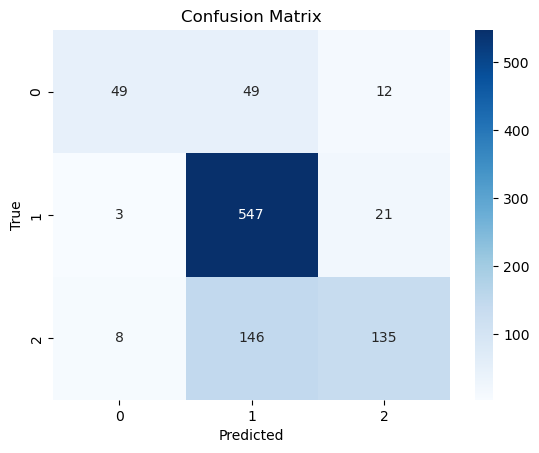

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f2_score = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score)

Accuracy: 0.7536082474226804
Precision: 0.7659843600929965
Recall: 0.7536082474226804
F2 Score: 0.7395118654904143


## Training Naive Bias Model


              precision    recall  f1-score   support

    negative       1.00      0.06      0.12       110
     neutral       0.69      0.97      0.80       571
    positive       0.64      0.34      0.44       289

    accuracy                           0.68       970
   macro avg       0.78      0.46      0.46       970
weighted avg       0.71      0.68      0.62       970



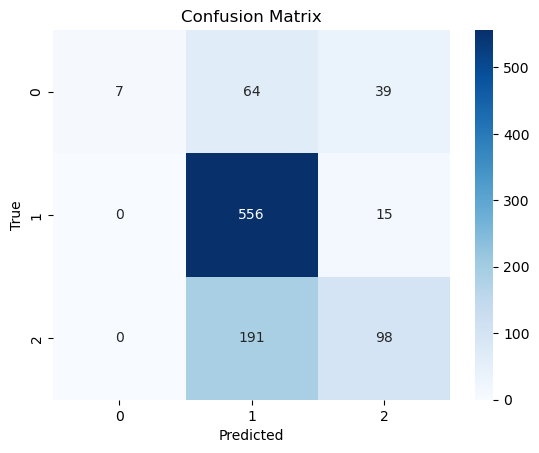

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_y_pred))
cmnb = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [32]:
accuracy_nb = accuracy_score(y_test, nb_y_pred)
print("Accuracy:", accuracy_nb)
precision_nb = precision_score(y_test, nb_y_pred, average='weighted')   
print("Precision:", precision_nb)
recall_nb = recall_score(y_test, nb_y_pred, average='weighted')
print("Recall:", recall_nb)
f2_score_nb = fbeta_score(y_test, nb_y_pred, beta=2, average='weighted')
print("F2 Score:", f2_score_nb)


Accuracy: 0.6814432989690722
Precision: 0.7090632365741536
Recall: 0.6814432989690722
F2 Score: 0.6492400002623985
